In [1]:
import pandas as pd
import numpy as np
import os

os.listdir('./data')

['seungmina_haejyo.csv',
 'TCGA_binary.csv',
 'TCGA_data.csv',
 'urine_binary.csv',
 'urine_k15_0419.csv',
 'urine_K15_0420.csv',
 'urine_k15_0423.csv',
 'urine_k15_0428.csv']

In [3]:
TCGA = pd.read_csv('./data/TCGA_data.csv')
urine = pd.read_csv('./data/urine_k15_0428.csv')

In [4]:
TCGA = TCGA[(TCGA.y == 'BLCA') | (TCGA.y == 'Normal')]
TCGA = TCGA.replace(['BLCA','Normal'],[ 1,0 ])
TCGA = TCGA.reset_index(drop = True)

In [5]:
urine = urine[(urine.y == 'BLCA') | (urine.y == 'NL')]
urine = urine.replace(['BLCA','NL'],[ 1,0 ])
urine = urine.reset_index(drop = True)

In [6]:
urine = urine.drop(['Unnamed: 0','X'], axis = 1)

In [7]:
X = TCGA.drop('y', axis = 1)
y = TCGA['y']

urine_X = urine.drop('y', axis = 1)
urine_y = urine['y']

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

standardsc = StandardScaler()
mms = MinMaxScaler()
mas = MaxAbsScaler()

standardsc.fit(X)
mms.fit(X)
mas.fit(X)

MaxAbsScaler(copy=True)

In [9]:
X_standard = pd.DataFrame(standardsc.transform(X), columns = X.columns)
X_mms = pd.DataFrame(mms.transform(X), columns = X.columns)
X_mas = pd.DataFrame(mas.transform(X), columns = X.columns)

urine_X_standard = standardsc.transform(urine_X)
urine_X_mms = mms.transform(urine_X)
urine_X_mas = mas.transform(urine_X)

C:\Users\wjssm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

def get_eval(y_test, pred) :
    
    print('accuracy : {0:.4f} precision : {1:.4f} recall : {2:.4f} F1 : {3:.4f} AUC : {4:.4f}'.format(
                                                        accuracy_score(y_test, pred), 
                                                        precision_score(y_test, pred),
                                                        recall_score(y_test, pred),
                                                        f1_score(y_test,pred),
                                                        roc_auc_score(y_test, pred)
                                                                      ))
    
    
    
    #print('accuracy : {0:.4f}'.format(accuracy_score(y_test,pred)), 'roc_auc_score : ', roc_auc_score(y_test,pred))
    #print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

In [67]:
def roc_curve_plot(y_test, pred_proba_c1) :
    
    fpr, tpr, threshold = roc_curve(y_test, pred_proba_c1)
    
    #ROC curve
    plt.plot(fpr, tpr, label = 'ROC')
    #대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    plt.xlabel('1-Specifity')
    plt.ylabel('Sensitivity')
    
    plt.legend()


In [21]:
import matplotlib.pyplot as plt

# logistic regression
- maxabs

In [68]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
import warnings
warnings.filterwarnings('ignore')

In [69]:
lr.fit(X_mas, y)
get_eval(urine_y, lr.predict(urine_X_mas))

accuracy : 0.5063 precision : 0.8750 recall : 0.2745 F1 : 0.4179 AUC : 0.6015
[[26  2]
 [37 14]]


sample 10 thresholds :  [2.   1.   0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.  ]
sample FPR(1-specifity) :  [0.    0.071 0.107 0.179 0.286 0.5   0.536 0.679 0.786 0.857 0.929]
sample TPR(sensitivity) :  [0.    0.098 0.392 0.431 0.49  0.51  0.549 0.569 0.608 0.667 0.882]


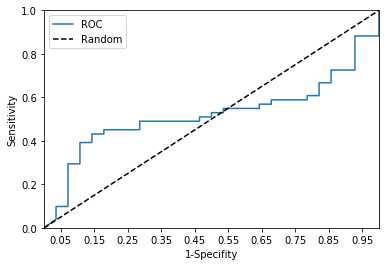

In [75]:
pred_proba = lr.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

thr_index = np.arange(0, threshold.shape[0], 3)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR(1-specifity) : ', np.round(fpr[thr_index],3))
print('sample TPR(sensitivity) : ', np.round(tpr[thr_index],3))

In [76]:
1-np.round(fpr[thr_index],3) + np.round(tpr[thr_index],3)

array([1.   , 1.027, 1.285, 1.252, 1.204, 1.01 , 1.013, 0.89 , 0.822,
       0.81 , 0.953])

# random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state = 0)

In [31]:
rf.fit(X, y)
get_eval(urine_y, rf.predict(urine_X))

accuracy : 0.6709 precision : 0.6712 recall : 0.9608 F1 : 0.7903 AUC : 0.5518
[[ 4 24]
 [ 2 49]]


sample 10 thresholds :  [1.95 0.75 0.5 ]
sample FPR :  [0.    0.321 0.821]
sample TPR :  [0.    0.588 0.941]


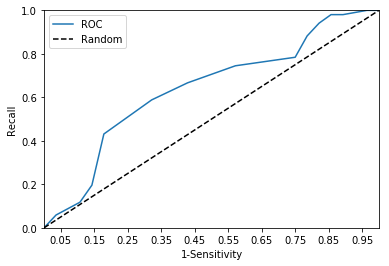

In [32]:
pred_proba = rf.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 5)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

# SVM

In [33]:
from sklearn.svm import SVC
svm = SVC(probability=True)

In [34]:
svm.fit(X, y)
get_eval(urine_y, svm.predict(urine_X))

accuracy : 0.6203 precision : 0.8182 recall : 0.5294 F1 : 0.6429 AUC : 0.6576
[[22  6]
 [24 27]]


sample 10 thresholds :  [2.   0.28 0.06 0.01 0.01]
sample FPR :  [0.    0.286 0.393 0.571 0.893]
sample TPR :  [0.    0.608 0.765 0.843 0.922]


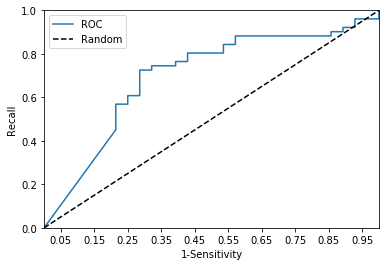

In [35]:
pred_proba = svm.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 5)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

# adaboost
- maxabs

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [37]:
ada.fit(X_mas, y)
get_eval(urine_y, ada.predict(urine_X_mas))

accuracy : 0.6962 precision : 0.8293 recall : 0.6667 F1 : 0.7391 AUC : 0.7083
[[21  7]
 [17 34]]


sample 10 thresholds :  [1.73 0.54 0.5  0.5  0.49 0.47 0.45 0.4 ]
sample FPR :  [0.    0.071 0.214 0.286 0.536 0.643 0.893 1.   ]
sample TPR :  [0.    0.294 0.608 0.686 0.745 0.882 0.922 1.   ]


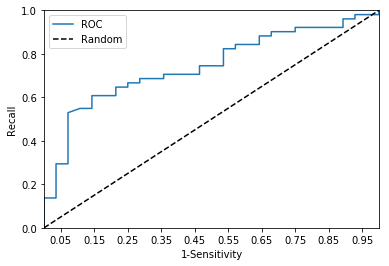

In [38]:
pred_proba = ada.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 5)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

# GBM

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [40]:
gb.fit(X, y)
get_eval(urine_y, gb.predict(urine_X))

accuracy : 0.6456 precision : 0.6667 recall : 0.9020 F1 : 0.7667 AUC : 0.5403
[[ 5 23]
 [ 5 46]]


sample 10 thresholds :  [2.   0.98 0.89 0.8  0.69 0.53 0.14]
sample FPR :  [0.    0.107 0.321 0.429 0.571 0.714 0.821]
sample TPR :  [0.    0.235 0.549 0.647 0.784 0.843 0.961]


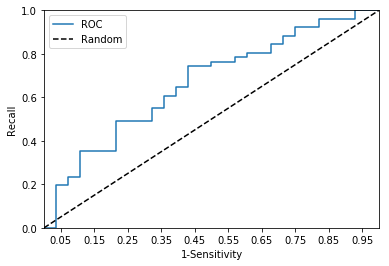

In [41]:
pred_proba = gb.predict_proba(urine_X_mas)[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 5)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

# xgboost

In [49]:
from xgboost import XGBClassifier
params = {'colsample_bytree': 0.3,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 200}

xgb = XGBClassifier(params = params)

In [50]:
xgb.fit(X.as_matrix(), y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       params={'colsample_bytree': 0.3, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [52]:
get_eval(urine_y, xgb.predict(urine_X.as_matrix()))

accuracy : 0.6456 precision : 0.6716 recall : 0.8824 F1 : 0.7627 AUC : 0.5483
[[ 6 22]
 [ 6 45]]


sample 10 thresholds :  [1.99 0.98 0.96 0.92 0.83 0.69 0.48]
sample FPR :  [0.    0.107 0.286 0.357 0.536 0.607 0.821]
sample TPR :  [0.    0.157 0.255 0.51  0.706 0.863 0.902]


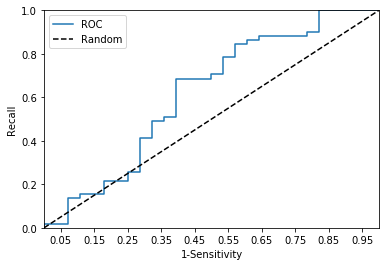

In [54]:
pred_proba = xgb.predict_proba(urine_X.as_matrix())[:,1]
roc_curve_plot(urine_y, pred_proba)

fpr, tpr, threshold = roc_curve(urine_y, pred_proba)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 5)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

In [56]:
np.round(fpr[thr_index],3) + np.round(tpr[thr_index],3)

array([0.   , 0.264, 0.541, 0.867, 1.242, 1.47 , 1.723])